In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
#read the data file using the function read_csv from pandas library
data = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
#print the first 3 rows in transpose to be more clear to read
data.head(3).T

,0,1,2
id,2539,2595,3647
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !
host_id,2787,2845,4632
host_name,John,Jennifer,Elisabeth
neighbourhood_group,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
room_type,Private room,Entire home/apt,Private room
price,149,225,150


# Data Describtion

In [3]:
#print the data types of inputs of data and be sure that they are accurate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#print the main numerical information of noncategorical columns
data.describe()
#we can find that id , host_id , latitude, longitude don not have big effect so we will benefit from price at most ways and how other columns can effect him

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#print the main information about categorical data
data.describe(include = 'object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [6]:
#print the number of missing values of the data
data.isnull().mean()*100
#missing values are at: name, host_name, last_review, reviews_per_month

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [7]:
#can be used to the most attractive host 
data['host_id'].value_counts().nlargest(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [8]:
#we can here determine that they are just names that do not have a big effect in analysis
#they are useful in just the way of past cell
data['host_name'].sample(5)

1593         Bethania
16137             Nat
29687        Svetlana
14813          Iliana
43739    Sonder (NYC)
Name: host_name, dtype: object

In [9]:
#it is a way of advertisement of the hosting place which is may be used in determining the effective one
data['name'].sample(5)

23893                 Top of the Heights Harlem Duplex!
4590     Chic Designer’s Room & 2 Beds in Manhattan LES
8922                 Perfect, 1 block from Central Park
11720                Cozy Upper East Side 1 bedroom apt
32444          Small, cosy room for the solo traveler!!
Name: name, dtype: object

# Handling missing values

In [10]:
#a column with string data type of date 
data['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [11]:
data['last_review'].isnull().sum()

10052

# Pandas Profiling

!pip install pandas-profiling

import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="Air_bnb.html")

# Neighbourhood Anlysis

In [12]:
#get the unique values of neighbourhood_group
data['neighbourhood_group'].unique() 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
# the number of unique values of the columns 
data['neighbourhood_group'].nunique() , data['neighbourhood'].nunique(), data['room_type'].nunique()

(5, 221, 3)

In [14]:
# visualize a pie chart of neighbourhood_group
# we have to convert to a percent so we used normalize = True
import plotly.express as px
percent = data['neighbourhood_group'].value_counts(normalize = True)
px.pie(percent, values=percent.values, names=percent.index, title='Neighbourhood Group')

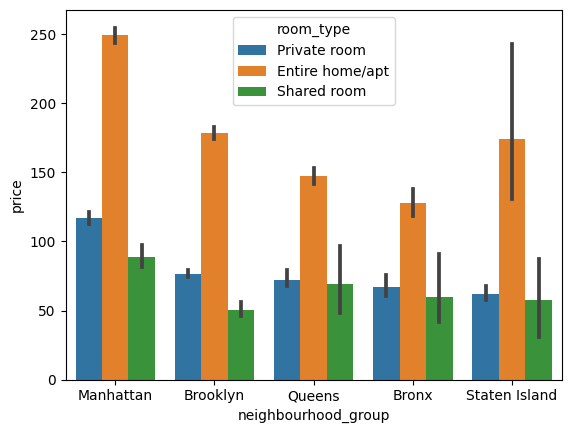

In [15]:
# visualize barplot of neighbourhood_group with price and different room_type
import seaborn as sns
sns.barplot(x='neighbourhood_group', y ='price', hue ='room_type', data = data, order=data.neighbourhood_group.value_counts().index);

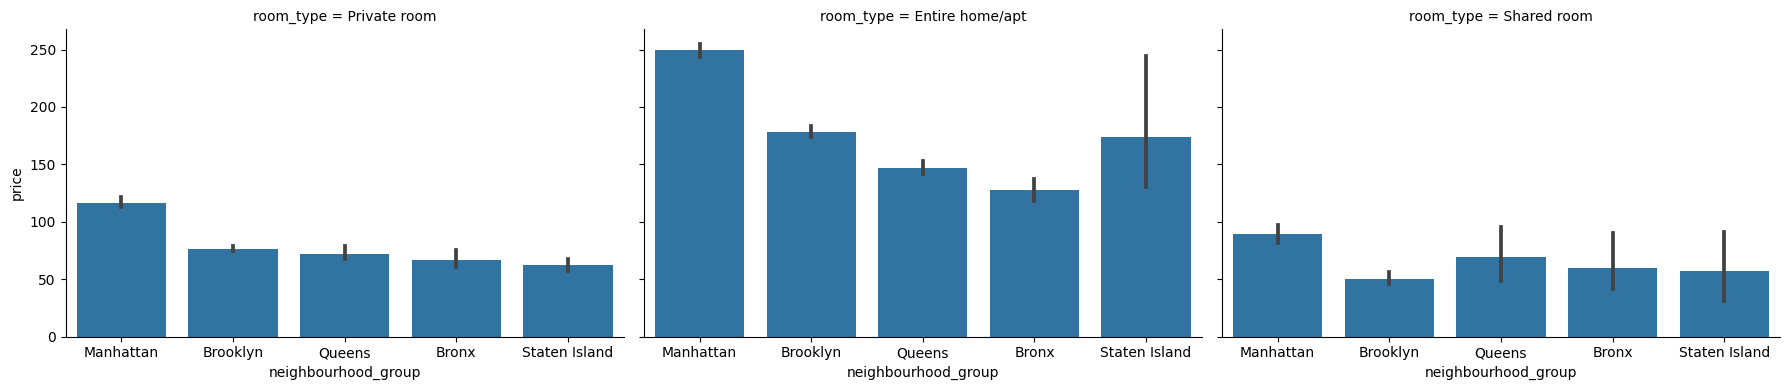

In [16]:
# same as pas visualize but make it mre readable for evry room type
grid = sns.FacetGrid(data, col='room_type', height=4, aspect=1.5, palette='Set1') 
grid.map(sns.barplot, 'neighbourhood_group', 'price', order=data.neighbourhood_group.value_counts().index); 

In [17]:
# crosstab to get the mean for every room type price with neighbourhood_group
heat_mean = pd.crosstab(index = data.neighbourhood_group , columns = data.room_type ,values= data.price , aggfunc = 'mean')
heat_mean

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [18]:
#same as above but using median not mean
heat_median = pd.crosstab(index = data.neighbourhood_group , columns = data.room_type ,values= data.price , aggfunc = 'median')
heat_median

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


<Axes: xlabel='room_type', ylabel='neighbourhood_group'>

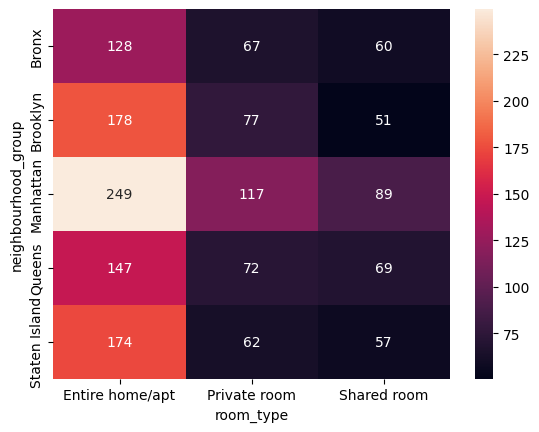

In [19]:
# visualize mean crosstab as heat map 
sns.heatmap(heat_mean , annot = True , fmt = '.0f')

<Axes: xlabel='room_type', ylabel='neighbourhood_group'>

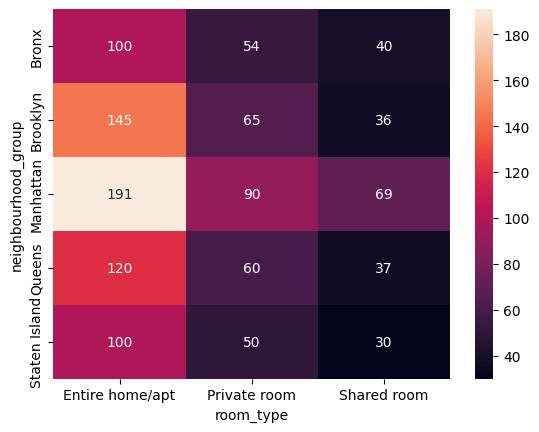

In [20]:
# visualize median crosstab as heat map 
sns.heatmap(heat_median , annot = True , fmt = '.0f')

# find the top 10 neighborhood in price for every room type

In [21]:
# find the top 10 neighborhood in price for every room type
nrp = data[['neighbourhood_group' , 'price' , 'room_type']].copy()
nrp.sort_values(by = 'price' , ascending = False , inplace = True)
result = nrp.head(10).copy()
result.info()
#making a new dataframe of needed data

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 9151 to 42523
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  10 non-null     object
 1   price                10 non-null     int64 
 2   room_type            10 non-null     object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


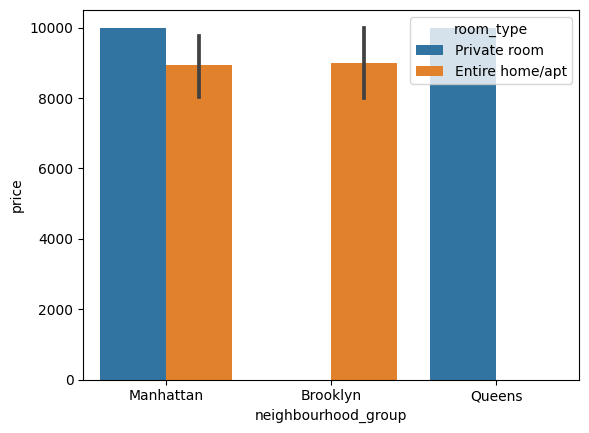

In [22]:
#making a barplot of neighbourhood_group with price depending on room_type of the new dataframe "result"
sns.barplot(x='neighbourhood_group', y ='price', hue ='room_type', data = result, order=result.neighbourhood_group.value_counts().index);

# analysis for price <1000

In [23]:
# analysis for price <1000
pricedata = data[data['price']<1000].copy()
pricedata.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [24]:
#get the main numerical data of the new dataframe "pricedata"
pricedata.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48597.0,1.902170e+07,1.097769e+07,2539.00000,9.476831e+06,1.967775e+07,2.914645e+07,3.648724e+07
host_id,48597.0,6.763529e+07,7.860145e+07,2438.00000,7.831209e+06,3.084879e+07,1.074344e+08,2.743213e+08
latitude,48597.0,4.072892e+01,5.457874e-02,40.49979,4.069000e+01,4.072296e+01,4.076312e+01,4.091306e+01
longitude,48597.0,-7.395203e+01,4.615434e-02,-74.24442,-7.398294e+01,-7.395557e+01,-7.393609e+01,-7.371299e+01
price,48597.0,1.402373e+02,1.129063e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,9.990000e+02
minimum_nights,48597.0,6.975019e+00,2.027523e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48597.0,2.337527e+01,4.465088e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38706.0,1.375349e+00,1.681966e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48597.0,7.168014e+00,3.304240e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48597.0,1.123679e+02,1.313787e+02,0.00000,0.000000e+00,4.400000e+01,2.250000e+02,3.650000e+02


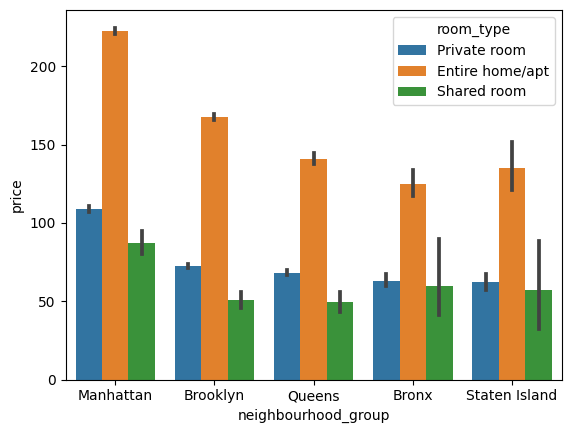

In [25]:
#making a barplot of neighbourhood_group with price depending on room_type of the new dataframe "pricedata"
sns.barplot(x='neighbourhood_group', y ='price', hue ='room_type', data = pricedata, order=pricedata.neighbourhood_group.value_counts().index);

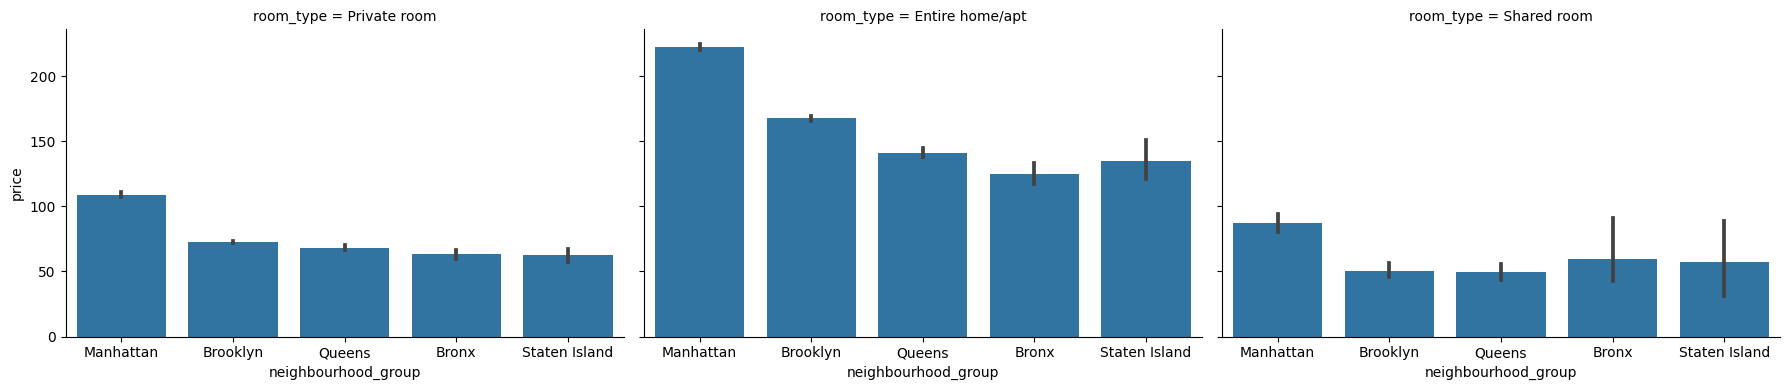

In [26]:
# similar to the above visualization but in readable way in room type
grid = sns.FacetGrid(pricedata, col='room_type', height=4, aspect=1.5, palette='Set1')
grid.map(sns.barplot, 'neighbourhood_group', 'price', order=pricedata.neighbourhood_group.value_counts().index); 

In [27]:
#know the main datatype and entries of pricedata
# we can find that pricedata has about 99% of the entries of the main data
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48597 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48597 non-null  int64  
 1   name                            48581 non-null  object 
 2   host_id                         48597 non-null  int64  
 3   host_name                       48576 non-null  object 
 4   neighbourhood_group             48597 non-null  object 
 5   neighbourhood                   48597 non-null  object 
 6   latitude                        48597 non-null  float64
 7   longitude                       48597 non-null  float64
 8   room_type                       48597 non-null  object 
 9   price                           48597 non-null  int64  
 10  minimum_nights                  48597 non-null  int64  
 11  number_of_reviews               48597 non-null  int64  
 12  last_review                     38706

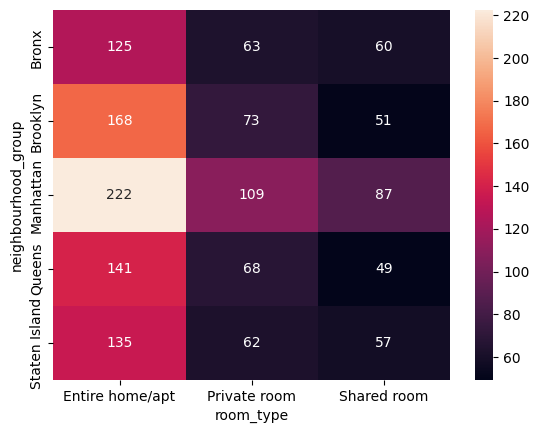

In [28]:
# making a heat map of the data of price less than 1000
# the values are very near to the main heatmap so the price from less than 1000 and more than 1000 doesnot change very much
heat_mean2 = pd.crosstab(index = pricedata.neighbourhood_group , columns = pricedata.room_type ,values= pricedata.price , aggfunc = 'mean')
sns.heatmap(heat_mean2 , annot = True , fmt = '.0f');

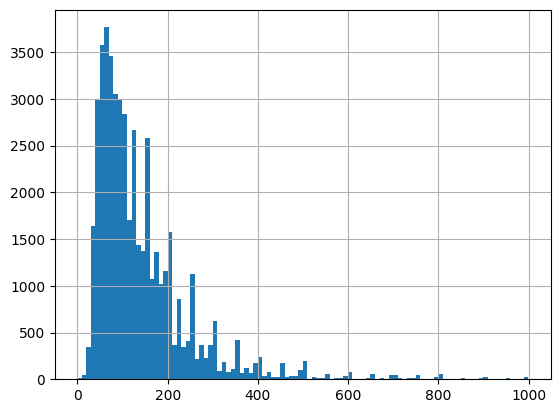

In [29]:
#histogram of price less than 1000 which is skewed
pricedata.price.hist(bins=100);

# distance between the property and the city center (latitude: 40.7128, longitude: -74.0060).

In [30]:
# first way by using geoby library 
data['lat2'] = 40.7128
data['long2'] = -74.0060
from geopy.distance import geodesic

# Function to calculate distance
def calculate_distance(row):
        coord1 = (row['latitude'], row['longitude'])
        coord2 = (row['lat2'], row['long2'])
        return geodesic(coord1, coord2).kilometers
        
# Apply the function to each row in the DataFrame
data['distance_km'] = data.apply(calculate_distance, axis = 1)

In [31]:
data['distance_km']

0         7.789889
1         4.906576
2        11.977809
3         4.970672
4        10.863385
           ...    
48890     6.076650
48891     6.273778
48892    12.312912
48893     5.121622
48894     5.861772
Name: distance_km, Length: 48895, dtype: float64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [33]:
numerical = data[['price' ,'distance_km' , 'latitude' , 'longitude']].copy() 
numerical.corr()['price'].apply(lambda x: abs(x)).sort_values() #weak correlation

latitude       0.033939
distance_km    0.147357
longitude      0.150019
price          1.000000
Name: price, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



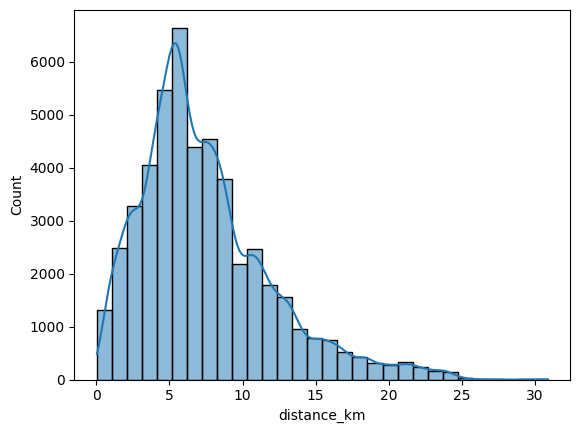

In [34]:
sns.histplot(data['distance_km'], bins=30, kde=True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='price', ylabel='Count'>

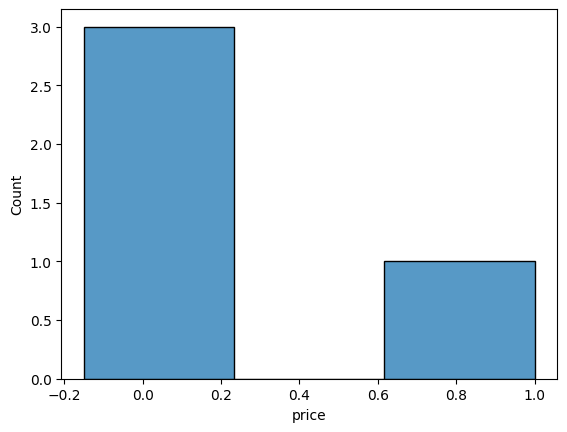

In [35]:
sns.histplot(numerical.corr()['price'].sort_values())

Thanks